# Import libraries

In [0]:
import pandas as pd
import numpy as np

from sklearn import svm
from sklearn.model_selection import train_test_split,cross_val_score, ShuffleSplit, GridSearchCV
from sklearn.feature_extraction.text import *
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import *
import matplotlib.pyplot as pl
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.evaluate import confusion_matrix

# Load Data

Mounted Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read data from file that is in my google Drive

In [0]:
filename= '/content/drive/My Drive/train_dataset.jsonl'
data = pd.read_json(filename, lines=True)

X is a list that contains all istruction of programs in the dataset 

In [0]:
X = ["  ".join(x) for x in data.instructions]
# for i in range (0, len(data.instructions)):
#   new = " ".join(data.instructions[i])
#   data.instructions[i]=new

X is a list that contains first word of each instruction of programs in the dataset

In [0]:
text=[]
X=[]
for row in data.instructions:
  for string in row:
    word= string.split()[0]
    text.append(word)
  row=" ".join(text)
  X.append(row)
  text=[]

Compute Tfidf -  Transforms text to feature vectors that can be used as input to estimator

TFIDF is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.  The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general.
In our case we have instructions that appear in X, list that we create from dataset.


In [0]:
#vectorizer = HashingVectorizer(ngram_range=(1,3))
#vectorizer = CountVectorizer()
vectorizer = TfidfVectorizer(ngram_range=(1,3))

## Split Data


With function *fit_trasform* the vectorizer learn vocabulary and idf, return term-document matrix.

In [0]:
X_all=vectorizer.fit_transform(X)

### Split for exercise 1 

For exercise 1 we want to consider the output as optimization,  *y_all1= data.opt*, so we take column of dataset labeled *opt* 

We use a function *train_test_split* to create 4 sets: 2 for training and 2 for test. We use it to choose the size of our training set, because with it we can predict new instances that we want to classify. 

In [0]:
y_all1 = data.opt
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_all, y_all1, test_size=0.2, random_state=15)


### Split for exercise 2


For exercise 2 we want to consider the output as compiler, *y_all2= data.compiler*, so we take column of dataset labeled compiler

We use a function *train_test_split*  same as exercise 1.

In [0]:
y_all2 = data.compiler
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_all, y_all2, test_size=0.2, random_state=15)


## Create a Model

Find a model for exercise 1 that can represent you set 

### Model for exercise 1

#### Bernoulli Model

In [0]:
model1 =BernoulliNB()
model1.fit(X_train1, y_train1)
print('Bernoulli Model created')

#### LogisticRegression Model

In [11]:
model1=LogisticRegression(penalty='l1', solver='saga')
model1.fit(X_train1, y_train1)
print('LogisticRegression Model created')

LogisticRegression Model created


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


#### SVM Model

In [0]:
model1 = svm.SVC(kernel='linear', gamma='scale')
model1.fit(X_train1, y_train1)
print('SVM Model created')

### Model for exercise 2

Find a model for exercise 2 that can represent you set 

#### Multinomial Model

In [0]:
model2 = MultinomialNB()
model2.fit(X_train2, y_train2)
print('Multinomial Model created')

#### Logistic Regression Model

In [12]:
model2=LogisticRegression(penalty='l1', solver='saga', multi_class='multinomial')
model2.fit(X_train2, y_train2)
print('LogisticRegression Model created')


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression Model created


## Evaluation

To evaluate the performance of a classification model such as the one that you just trained, you can use evaluation such as the confusion matrix and classification report.

### Evaluation for esercise 1

#### Evaluation test set

In [0]:
y_pred1 = model1.predict(X_test1)

Confusion Matrix

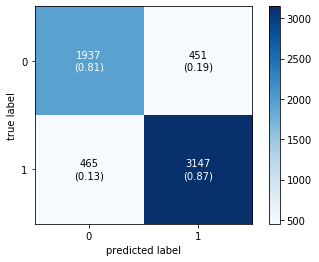

In [14]:
cm1= confusion_matrix(y_test1,y_pred1)
fig1, ax1 = plot_confusion_matrix(conf_mat=cm1,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True
                                )

Classification Report

In [15]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           H       0.81      0.81      0.81      2388
           L       0.87      0.87      0.87      3612

    accuracy                           0.85      6000
   macro avg       0.84      0.84      0.84      6000
weighted avg       0.85      0.85      0.85      6000



#### Evaluation Train Set

Classification report

In [16]:
y_pred11 = model1.predict(X_train1)
print(classification_report(y_train1, y_pred11))

              precision    recall  f1-score   support

           H       0.83      0.83      0.83      9688
           L       0.88      0.88      0.88     14312

    accuracy                           0.86     24000
   macro avg       0.86      0.86      0.86     24000
weighted avg       0.86      0.86      0.86     24000



### Evaluation for esercise 2

#### Evaluation test set

In [0]:
y_pred2 = model2.predict(X_test2)

Confusion Matrix

[[1903   68   38]
 [  78 1870   46]
 [  63   41 1893]]


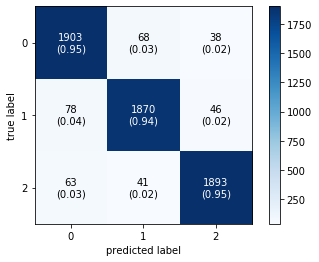

In [18]:
cm = confusion_matrix(y_target=y_test2, 
                      y_predicted=y_pred2, 
                      binary=False)
print(cm)
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True
                                )

Classification Report

In [19]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

       clang       0.93      0.95      0.94      2009
         gcc       0.94      0.94      0.94      1994
         icc       0.96      0.95      0.95      1997

    accuracy                           0.94      6000
   macro avg       0.94      0.94      0.94      6000
weighted avg       0.94      0.94      0.94      6000



#### Evaluation Train Set

In [20]:
y_pred22 = model2.predict(X_train2)
print(classification_report(y_train2, y_pred22))

              precision    recall  f1-score   support

       clang       0.94      0.95      0.94      7991
         gcc       0.94      0.94      0.94      8006
         icc       0.96      0.95      0.96      8003

    accuracy                           0.95     24000
   macro avg       0.95      0.95      0.95     24000
weighted avg       0.95      0.95      0.95     24000



## Blind Test

The blind test contains only input data to classify with 2 models that i have choose for opt and for compiler

In [0]:
filename_new= '/content/drive/My Drive/test_dataset_blind.jsonl'
data_new = pd.read_json(filename_new, lines=True)

We need to take again instructions of blind test

In [0]:
for i in range (0, len(data_new.instructions)):
    new = " ".join(data_new.instructions[i])
    data_new.instructions[i]=new

In this case we use *trasform* instruction of vectorizer,that we use for two models, because we don't want it learn vocabulary but because it already knows the vocabulary. We want only that it transforms instructions.

And after make predictions using model1 and model2, respectively model used fro ot and model used for compiler.

In [0]:
X_all_new=vectorizer.transform(data_new.instructions)
y_pred_new1= model1.predict(X_all_new)
y_pred_new2= model2.predict(X_all_new)

Now we wanto to creare CSV file, so we write in cvs in such way we can obtain < compiler >, < opt >

In [24]:
countH=0
countL=0
with open('/content/drive/My Drive/1743997.csv','w') as file:
    for index in range (0, len(y_pred_new2)):
        if(y_pred_new1[index]=='H'): countH = countH+1
        else: countL = countL+1
        file.write(y_pred_new2[index]+ "," + y_pred_new1[index])
        file.write('\n')
file.close()

print("H", countH)
print("L", countL)

H 1294
L 1706
